# File reading and data processing

In [1]:
### Setup the library ###
import pyrogue  as pr
import pyrogue.protocols
import pyrogue.utilities.fileio
import rogue

import os, sys
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )
import setupLibPaths

import ePix320kM as fpgaBoard

import numpy as np
from matplotlib import pyplot as plt

# Load common dataProc functions 

In [16]:
%run dataProcFunctions.ipynb     #this is were my function was stored

# Initialization code and helper function

In [9]:
readerReceiver = fpgaBoard.DataDebug(name = "readerReceiver", size = 70000)
fread = rogue.utilities.fileio.StreamReader()
readUnbatcher = rogue.protocols.batcher.SplitterV1() 
readerReceiver << readUnbatcher << fread
readerReceiver.enableDataDebug(True)
readerReceiver.enableDebugPrint(True)
        
def readFromFile(filename) :

    readerReceiver.cleanData()
    fread.open(filename)
    fread.closeWait()

# READ file and descramble

In [27]:
# Has good performance

ssdPath = "/u1/ePixHRM320k/measurements/20240306_source/"
filename = f"{ssdPath}/03062024_Fe55_50V_RX000_0.dat"

readFromFile(filename)

gue.batcher.CoreV1: Version mismatch. Got 4
1709770164.608677:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770164.749440:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770164.891758:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.031029:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.175764:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.316908:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.457836:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.594740:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.734556:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770165.875493:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770166.015842:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770166.152037:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770166.292781:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770166.434012:pyrogue.batcher.CoreV1: Version mismatch. Got 4
1709770166.573295:pyrogue.batche

In [28]:
np.shape(readerReceiver.getData())

(192, 384, 10000)

# Save data into numpy array (optional)


In [29]:
# np.save('/u1/ePixHRM320k/numpy/dark_1us.numpy', readerReceiver.getData())

# Remove average = 'dark' from dataset, works only in low occupancy!

In [30]:
# Remove pixels at the edges
# data = np.copy(readerReceiver.getData()[:,:,0:100]).astype(float)
data = np.copy(readerReceiver.getData()[:,:,0:10000]).astype(float)
print(np.shape(data))

# Remove dark (only works if low-occupancy!!)
data -= np.median(data, axis=2, keepdims=True)

(192, 384, 10000)


# Apply row/col common-mode correction on frame-by-frame  (optional)

In [31]:
# Common mode correction on both arrays
data -= np.median(data, axis=(0,1), keepdims=True)
data -= np.median(data, axis=1, keepdims=True) # rows (cols)
# data -= np.median(data, axis=0, keepdims=True) # cols (rows)

Median Noise [ADUs]: 60.340491074331304


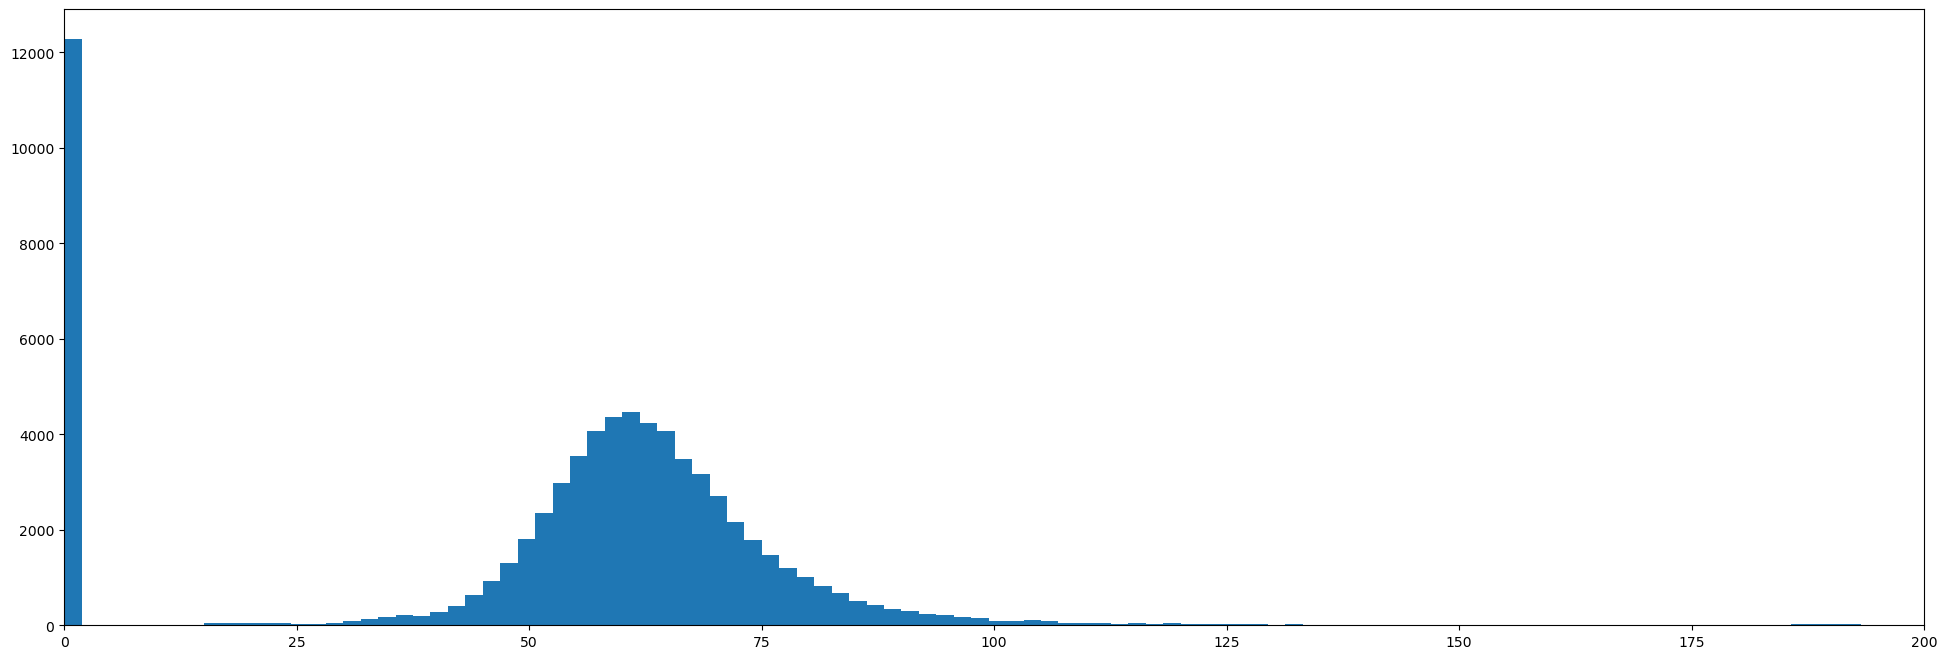

In [32]:
# Calculate noise
noise = np.std(data, axis=2, keepdims=True)
fig, ax = plt.subplots(figsize=(24, 8))

ax.hist(noise.flatten(),bins=1000)
ax.set_xlim([0,200])

noise = np.median(noise)

print('Median Noise [ADUs]:',noise)

# Function to filter noisy pixels with noise > 2xSTD (optional)
#  works only in low occupancy!

In [33]:
data, num_bad_pixels = filter_bad_pixels(data, 3)

# Plot noise map

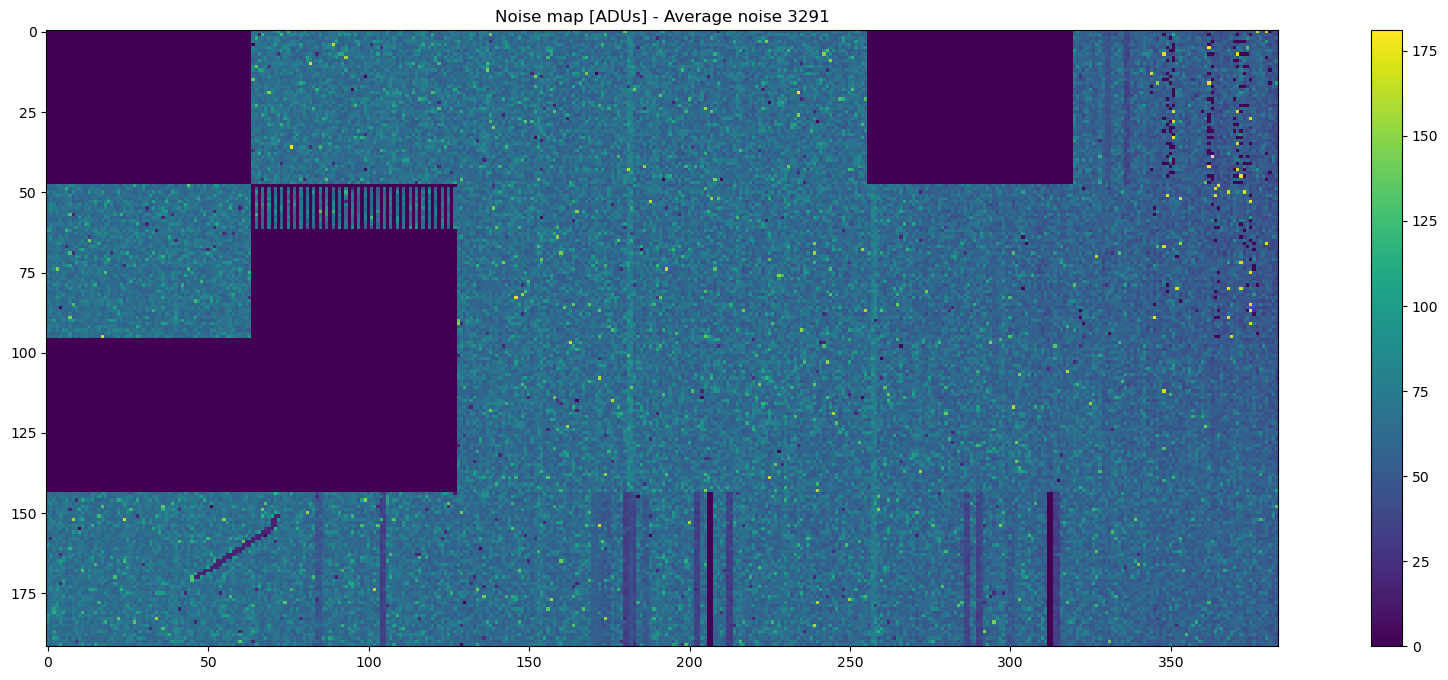

In [34]:
fig, ax = plt.subplots(figsize=(24, 8))
plt.imshow(np.std(data, axis=2), origin='lower')
plt.title('Noise map [ADUs] - Average noise {}'.format(noise_pix))
plt.colorbar()

In [37]:
# Subtract mean and display image
dataDarkSub = data - np.median(data, axis=2, keepdims=True)

# Trim range here if needed
dataDarkSub = dataDarkSub[(dataDarkSub > -4000)]

# Trim range here if needed
dataDarkSub2 = dataDarkSub[(dataDarkSub < -500)]


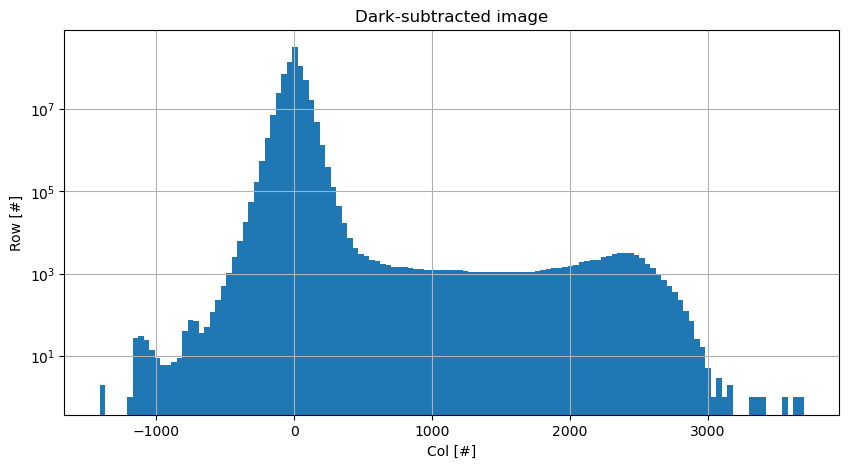

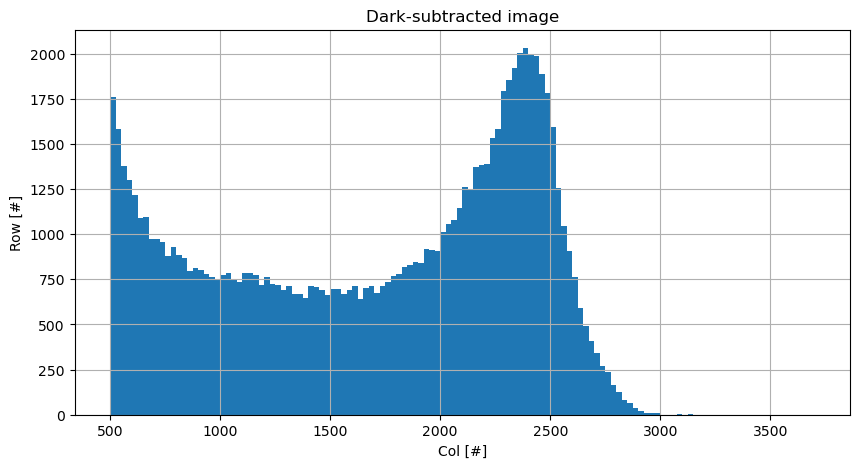

In [38]:
# Plots
plt.figure(figsize = (10,5))
plt.hist(-1*dataDarkSub.flatten(),bins=2**7, log=True)
plt.ylabel("Row [#]")
plt.xlabel("Col [#]")
plt.title("Dark-subtracted image")
plt.grid()

plt.figure(figsize = (10,5))
plt.hist(-1*dataDarkSub2.flatten(),bins=2**7)
plt.ylabel("Row [#]")
plt.xlabel("Col [#]")
plt.title("Dark-subtracted image")

plt.grid()